

---

---




# Treinamento de neurônio PERCEPTRON - Scikit-learn

Este notebook mostra o uso do modelo [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) da biblioteca [Scikit-learn](https://scikit-learn.org/stable/index.html) para criar e treinar um neurônio para as seguintes relações lógicas:

* AND
* OR
* tentativa de aprendizado da relação XOR

Adicionalmente (em relação a versão 1), este notebook emprega uma função que mostra a fronteira de decisão do Perceptron.


---

---





## Bibliotecas/pacotes

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.linear_model import Perceptron

## Função que mostra a fronteira de decisão do Perceptron

Baseada em: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [14]:
def plota_fronteira_decisao(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01
  cm = plt.cm.RdBu
  thr = 0.0
  xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
  if hasattr(classifier, 'decision_function'):
    Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  else:
    Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
  plt.colorbar()
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xticks((0.0, 1.0))
  plt.yticks((0.0, 1.0))
  plt.title(title)


## Relação AND
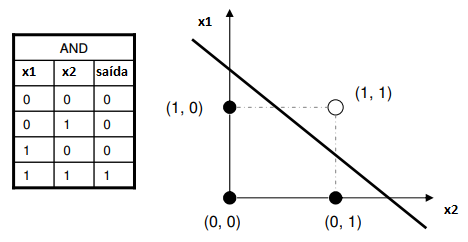

In [15]:
# Dados de entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=np.float)
# Saídas AND
y_AND = np.array([0, 0, 0, 1])

# Criando um peceptron
p = Perceptron()

# Treinando um perceptron
p.fit(X, y_AND)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Predição (teste do perceptron treinado)

In [16]:
p.predict(X)

array([0, 0, 0, 1])

## Plota a fronteira de decisão definida pelo Perceptron

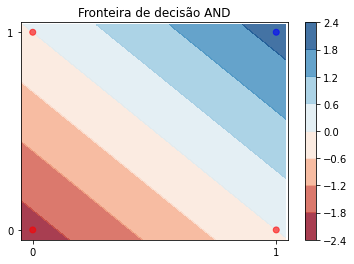

In [17]:
plota_fronteira_decisao(p, X, y_AND, 'Fronteira de decisão AND')

## Relação OR
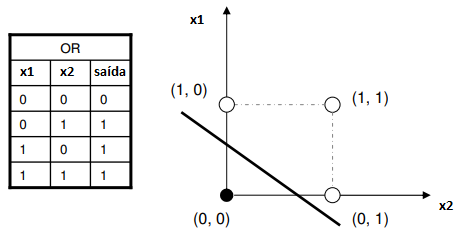

In [18]:
# Dados de entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=np.float)
# Saídas OR
y_OR = np.array([0, 1, 1, 1])

# Criando um peceptron
p = Perceptron()

# Treinando um perceptron
p.fit(X, y_OR)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Predição (teste do perceptron treinado)

In [19]:
p.predict(X)

array([0, 1, 1, 1])

## Plota a fronteira de decisão definida pelo Perceptron

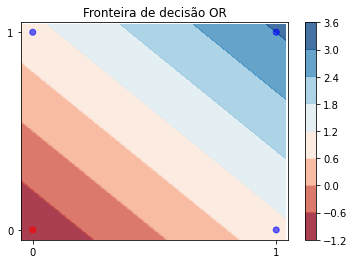

In [20]:
plota_fronteira_decisao(p, X, y_OR, 'Fronteira de decisão OR')

## Relação XOR (não linear!!!)
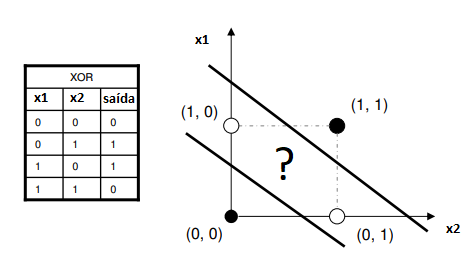


In [21]:
# Dados de entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=np.float)
# Saídas XOR
y_XOR = np.array([0, 1, 1, 0])

# Criando um peceptron
p = Perceptron()

# Treinando um perceptron
p.fit(X, y_XOR)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Predição (teste do perceptron treinado)

O perceptron treinado não é capaz de aprender a relação XOR, pois trata-se de um problema de classificação **não linear**!!!


In [22]:
p.predict(X)

array([0, 0, 0, 0])

## Plota a fronteira de decisão definida pelo Perceptron

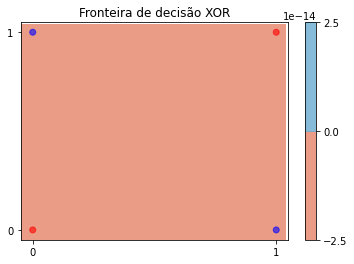

In [23]:
plota_fronteira_decisao(p, X, y_XOR, 'Fronteira de decisão XOR')